In [68]:
import pandas_datareader.data as web

In [69]:
import datetime
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2021,8,1)
df = web.DataReader('GOOGL', 'stooq',start, end)

In [70]:
df.sort_index(inplace=True, ascending=True)
df.dropna(inplace=True)
print(df)

                Open       High        Low     Close      Volume
Date                                                            
2004-08-19    50.000    52.0300    47.9800    50.170  44703800.0
2004-08-20    50.505    54.5400    50.2500    54.155  22857200.0
2004-08-23    55.375    56.7400    54.5250    54.700  18274400.0
2004-08-24    55.620    55.8000    51.7850    52.435  15262600.0
2004-08-25    52.480    54.0000    51.9400    53.000   9197800.0
...              ...        ...        ...       ...         ...
2021-07-19  2521.790  2524.1000  2470.1000  2491.560   1398379.0
2021-07-20  2510.550  2540.8636  2487.0100  2524.190   1315822.0
2021-07-21  2522.670  2551.9200  2520.4700  2550.980   1037309.0
2021-07-22  2556.880  2569.6600  2549.9769  2568.430    715094.0
2021-07-23  2608.610  2667.9799  2596.0100  2660.300   2075321.0

[4261 rows x 5 columns]


In [71]:
predict_count = int(len(df)*0.02)
df['label'] = df['Close'].shift(-predict_count)
print(df)

                Open       High        Low     Close      Volume   label
Date                                                                    
2004-08-19    50.000    52.0300    47.9800    50.170  44703800.0  92.510
2004-08-20    50.505    54.5400    50.2500    54.155  22857200.0  91.875
2004-08-23    55.375    56.7400    54.5250    54.700  18274400.0  93.150
2004-08-24    55.620    55.8000    51.7850    52.435  15262600.0  93.950
2004-08-25    52.480    54.0000    51.9400    53.000   9197800.0  95.955
...              ...        ...        ...       ...         ...     ...
2021-07-19  2521.790  2524.1000  2470.1000  2491.560   1398379.0     NaN
2021-07-20  2510.550  2540.8636  2487.0100  2524.190   1315822.0     NaN
2021-07-21  2522.670  2551.9200  2520.4700  2550.980   1037309.0     NaN
2021-07-22  2556.880  2569.6600  2549.9769  2568.430    715094.0     NaN
2021-07-23  2608.610  2667.9799  2596.0100  2660.300   2075321.0     NaN

[4261 rows x 6 columns]


In [72]:
X = df.drop(['label'],axis=1)
y = df['label'][:-predict_count]

In [73]:
print(y)

Date
2004-08-19      92.510
2004-08-20      91.875
2004-08-23      93.150
2004-08-24      93.950
2004-08-25      95.955
                ...   
2021-03-17    2491.560
2021-03-18    2524.190
2021-03-19    2550.980
2021-03-22    2568.430
2021-03-23    2660.300
Name: label, Length: 4176, dtype: float64


In [74]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)
print(X)

[[-1.11986298 -1.11660464 -1.12189299 -1.1185183   4.88423503]
 [-1.11885236 -1.11163017 -1.11730928 -1.11055221  2.08299145]
 [-1.10910644 -1.10727008 -1.10867697 -1.10946275  1.49536962]
 ...
 [ 3.82848322  3.83782309  3.87069308  3.88064668 -0.71482741]
 [ 3.89694481  3.87298126  3.93027502  3.91552955 -0.75614289]
 [ 4.0004677   4.06783737  4.02322755  4.09917936 -0.58173006]]


In [75]:
X_lately = X[-predict_count:]
X = X[:-predict_count]
print(len(X))
print(len(X_lately))

4176
85


In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(x_train))
print(len(y_train))

3340
3340


In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9689647454954871

In [78]:
predict = model.predict(X_lately)
print(len(predict))
print(predict)

85
[2271.4995179  2259.52102829 2220.03960165 2257.95187081 2231.03665833
 2302.33061264 2366.95659237 2573.43436857 2414.07564215 2448.01614083
 2457.98773101 2485.50281082 2434.27726946 2432.99848829 2452.78834891
 2531.69473264 2465.31629833 2521.98357886 2504.28946986 2470.02582499
 2523.21026363 2545.12258712 2519.36022352 2510.53149742 2766.89554407
 2603.880413   2595.36355994 2620.98964773 2588.08380046 2519.70967439
 2567.42618184 2555.85849094 2556.04070188 2520.41595938 2502.73642135
 2431.07992727 2492.60468268 2494.73078209 2534.08292428 2525.90205115
 2505.18423317 2505.51700016 2633.71988808 2581.27366965 2578.98419404
 2585.17450594 2552.34432705 2579.84573847 2607.78681129 2544.23708716
 2620.29966941 2587.96912625 2607.35175991 2572.16543128 2649.1496912
 2618.14913885 2649.02991521 2664.65489387 2668.71220115 2692.19766919
 2634.89482491 2673.16320789 2637.78681959 2663.68436933 2629.59112551
 2633.4033984  2639.42464085 2651.15292531 2613.03039149 2635.9716697
 2767

In [79]:
import numpy as np
df['predict'] = np.nan
print(df)

                Open       High        Low     Close      Volume   label  \
Date                                                                       
2004-08-19    50.000    52.0300    47.9800    50.170  44703800.0  92.510   
2004-08-20    50.505    54.5400    50.2500    54.155  22857200.0  91.875   
2004-08-23    55.375    56.7400    54.5250    54.700  18274400.0  93.150   
2004-08-24    55.620    55.8000    51.7850    52.435  15262600.0  93.950   
2004-08-25    52.480    54.0000    51.9400    53.000   9197800.0  95.955   
...              ...        ...        ...       ...         ...     ...   
2021-07-19  2521.790  2524.1000  2470.1000  2491.560   1398379.0     NaN   
2021-07-20  2510.550  2540.8636  2487.0100  2524.190   1315822.0     NaN   
2021-07-21  2522.670  2551.9200  2520.4700  2550.980   1037309.0     NaN   
2021-07-22  2556.880  2569.6600  2549.9769  2568.430    715094.0     NaN   
2021-07-23  2608.610  2667.9799  2596.0100  2660.300   2075321.0     NaN   

           

In [80]:
import datetime
# print(df.index[-1])
last_date_st = df.index[-1].timestamp()
next_date_st = last_date_st + 86400

# print(next_date)

for i in predict:
    next_date = datetime.datetime.fromtimestamp(next_date_st)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    next_date_st +=  86400

print(df.tail(40))

                     Open  High  Low  Close  Volume  label      predict
Date                                                                   
2021-09-07 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2585.174506
2021-09-08 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2552.344327
2021-09-09 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2579.845738
2021-09-10 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2607.786811
2021-09-11 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2544.237087
2021-09-12 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2620.299669
2021-09-13 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2587.969126
2021-09-14 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2607.351760
2021-09-15 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2572.165431
2021-09-16 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2649.149691
2021-09-17 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2618.149139
2021-09-18 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  2649

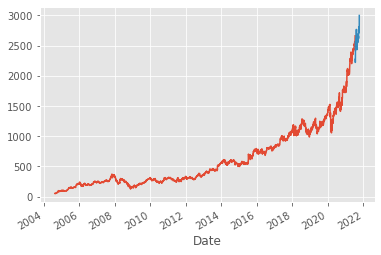

In [81]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
df['Close'].plot()
df['predict'].plot()
plt.show()